AI FINAL PROJECT

• Read data  
• Show head of data  
• Shape  
• Description of data  
• Information of data  
• Data Visualization  
• Check columns and drop unnecessary columns  
• Check Null value drop Null value or replace Null value  
• Check Duplicated value drop duplicated value   
• Encoding data by label encoder or one hot encoder   
• Normalization Scaling data  
• Split data to train test  
• ML Model 
• Metrics 
• Confusion Matrix

Read CSV File

In [1]:
import pandas as pd 

In [2]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')

Head Of Data

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Shape Of Data

In [4]:
data.shape

(5110, 12)

Description Of Data

In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Information Of Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Visualization Of Data

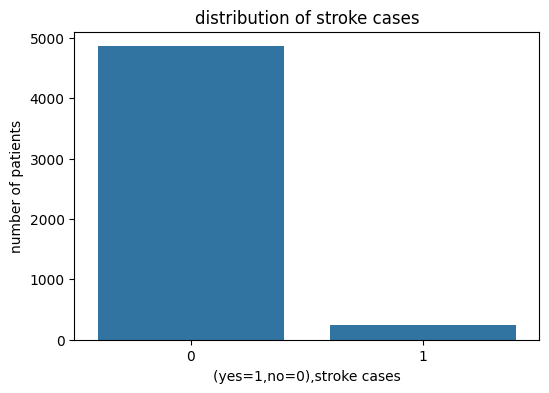

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='stroke', data=data)
plt.title("distribution of stroke cases")
plt.xlabel("(yes=1,no=0),stroke cases")
plt.ylabel("number of patients")
plt.show()

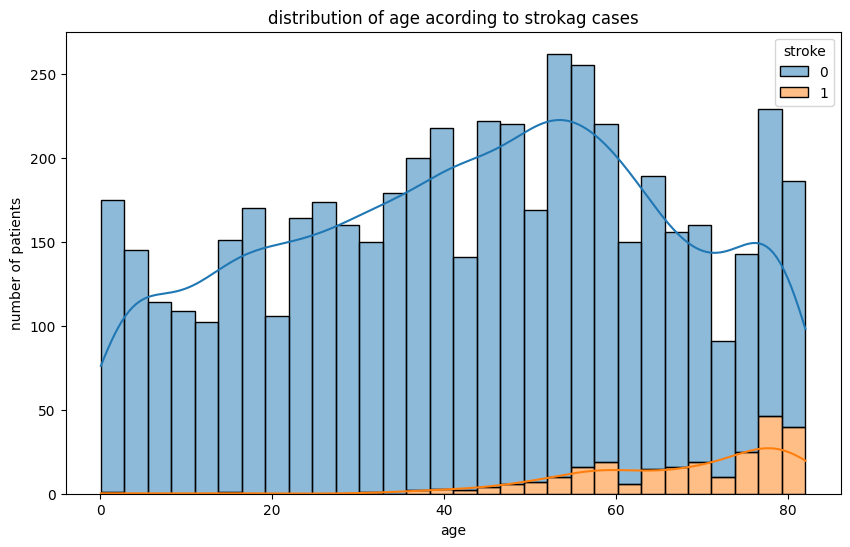

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='age', hue='stroke', bins=30, kde=True, multiple='stack')
plt.title("distribution of age acording to strokag cases")
plt.xlabel("age")
plt.ylabel("number of patients")
plt.show()

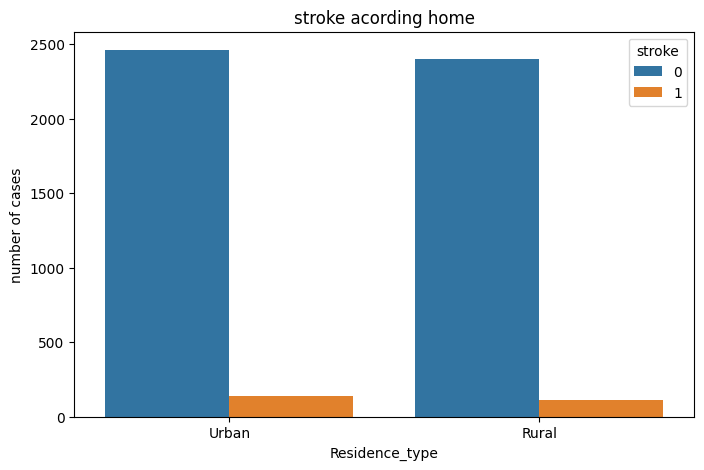

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='Residence_type', hue='stroke', data=data)
plt.title("stroke acording home")
plt.xlabel('Residence_type')
plt.ylabel("number of cases")
plt.show()

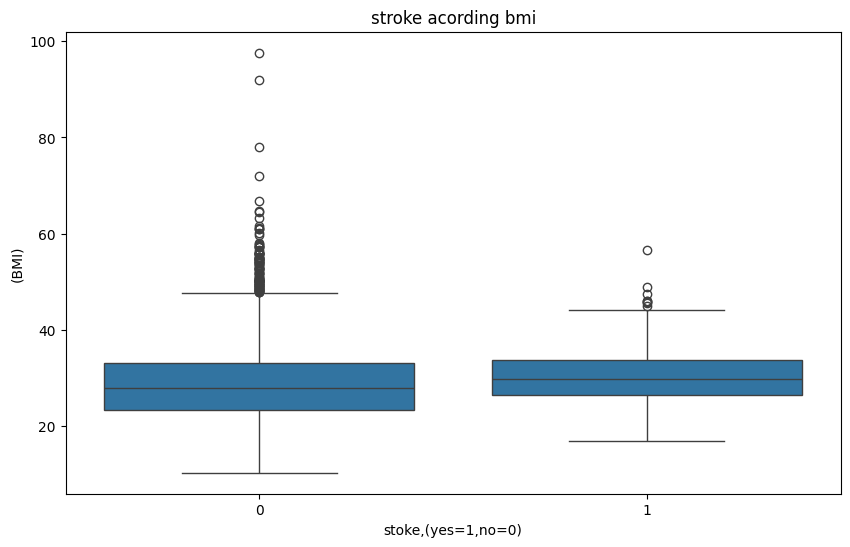

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='stroke', y='bmi', data=data)
plt.title("stroke acording bmi")
plt.xlabel('stoke,(yes=1,no=0)')
plt.ylabel('(BMI)')
plt.show()

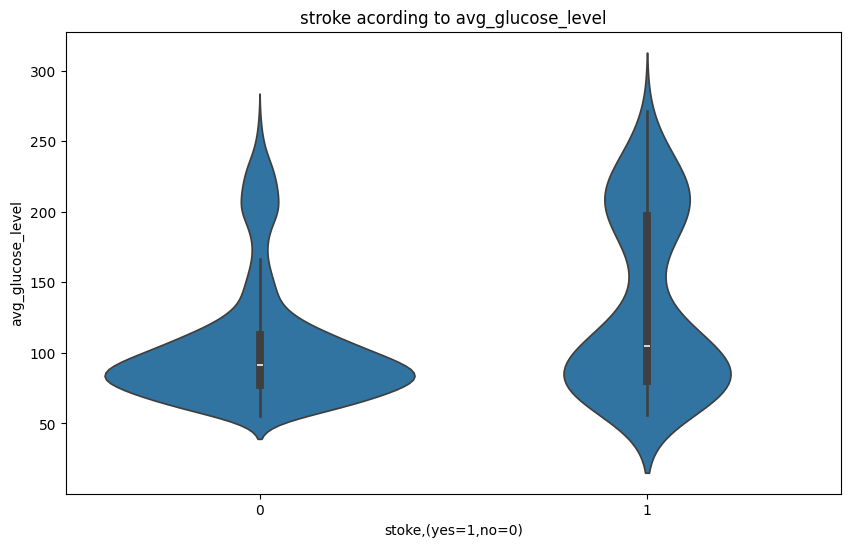

In [11]:
plt.figure(figsize=(10,6))
sns.violinplot(x='stroke', y='avg_glucose_level', data=data)

plt.title("stroke acording to avg_glucose_level")
plt.xlabel('stoke,(yes=1,no=0)')

plt.ylabel("avg_glucose_level")
plt.show()

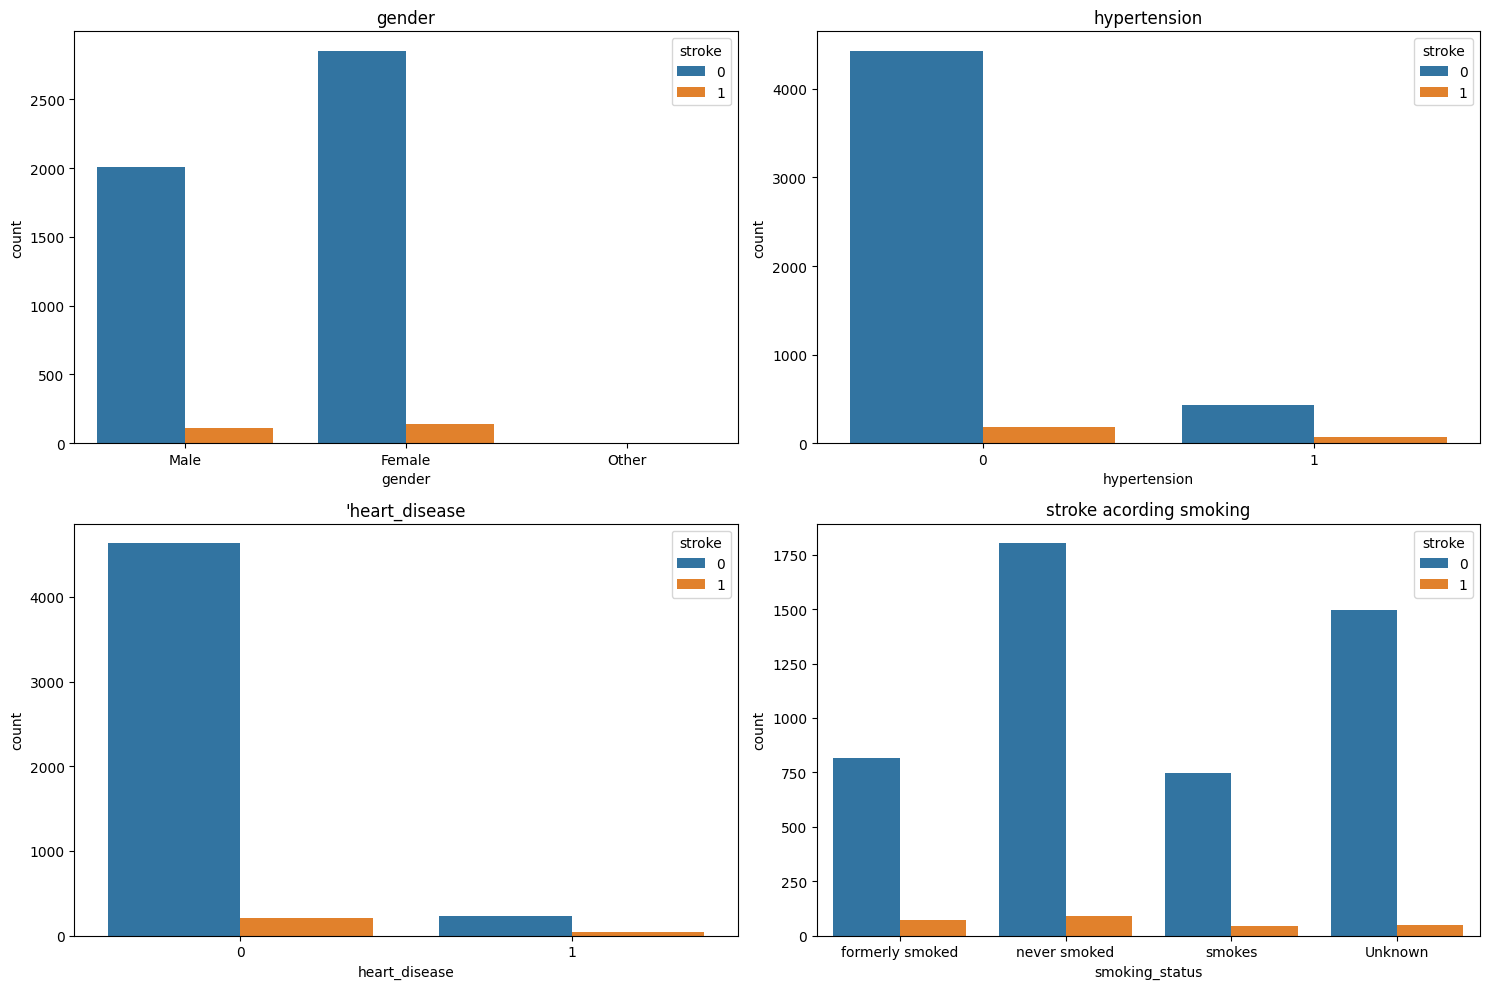

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
sns.countplot(x='smoking_status', hue='stroke', data=data, ax=axes[1,1])
axes[1,1].set_title("stroke acording smoking")

sns.countplot(x='gender', hue='stroke', data=data, ax=axes[0,0])
axes[0,0].set_title('gender')

sns.countplot(x='hypertension', hue='stroke', data=data, ax=axes[0,1])
axes[0,1].set_title("hypertension")

sns.countplot(x='heart_disease', hue='stroke', data=data, ax=axes[1,0])
axes[1,0].set_title("'heart_disease")

plt.tight_layout()
plt.show()

Show Columns of Data

In [13]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Drop ID Column

In [14]:
data.drop(columns="id",inplace=True)

In [15]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Check For Null Values

In [16]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Fill Null Values in bmi Column

In [17]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

C:\Users\Abd el Aziz\AppData\Local\Temp\ipykernel_10704\1997496975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


In [18]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Check For duplicated Values

In [19]:
data.duplicated().sum()

np.int64(0)

Feature Engineering – Interaction & Polynomial Features

In [20]:
data['age_bmi'] = data['age'] * data['bmi']
data['glucose_bmi'] = data['avg_glucose_level'] * data['bmi']
data['age_glucose'] = data['age'] * data['avg_glucose_level']
data['age_squared'] = data['age'] ** 2
data['glucose_squared'] = data['avg_glucose_level'] ** 2
data['bmi_squared'] = data['bmi'] ** 2
data['age_cubed'] = data['age'] ** 3

Encoding use [Label Encoding]

In [21]:
l=data.select_dtypes(include=["object"]).columns
l

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

Count Number of Other in gender Column

In [22]:
other_count = data['gender'].value_counts()['Other']
other_count

np.int64(1)

Remove Other in gender Column

In [23]:
data = data.drop(data[data['gender'] == 'Other'].index)

In [24]:
for i in l :
    print(f"column {i} has {data[i].unique()}")

column gender has ['Male' 'Female']
column ever_married has ['Yes' 'No']
column work_type has ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
column Residence_type has ['Urban' 'Rural']
column smoking_status has ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Count Number of Unknown in smoking_status Column

In [25]:
Unknown_count = data['smoking_status'].value_counts()['Unknown']
Unknown_count

np.int64(1544)

Merging Data into Working & Not Working

In [26]:
data['work_type'] = data['work_type'].replace(['Private', 'Self-employed', 'Govt_job'], 'Working')
data['work_type'] = data['work_type'].replace(['children', 'Never_worked'], 'Not Working')


In [27]:
for i in l :
    print(f"column{i} has {data[i].unique()}")

columngender has ['Male' 'Female']
columnever_married has ['Yes' 'No']
columnwork_type has ['Working' 'Not Working']
columnResidence_type has ['Urban' 'Rural']
columnsmoking_status has ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


Merging Data into smoking & not smoking

In [28]:
data['smoking_status'] = data['smoking_status'].replace(['formerly smoked', 'smokes'], 'smoking')
data['smoking_status'] = data['smoking_status'].replace(['never smoked'], 'not smoking')

In [29]:
for i in l :
    print(f"column {i} has {data[i].unique()}")

column gender has ['Male' 'Female']
column ever_married has ['Yes' 'No']
column work_type has ['Working' 'Not Working']
column Residence_type has ['Urban' 'Rural']
column smoking_status has ['smoking' 'not smoking' 'Unknown']


In [30]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in l:
    data[i]=label.fit_transform(data[i])

In [31]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bmi,glucose_bmi,age_glucose,age_squared,glucose_squared,bmi_squared,age_cubed
0,1,67.0,0,1,1,1,1,228.69,36.6,2,1,2452.2,8370.054,15322.23,4489.0,52299.1161,1339.56,300763.0
1,0,61.0,0,0,1,1,0,202.21,28.1,1,1,1714.1,5682.101,12334.81,3721.0,40888.8841,789.61,226981.0
2,1,80.0,0,1,1,1,0,105.92,32.5,1,1,2600.0,3442.400,8473.60,6400.0,11219.0464,1056.25,512000.0
3,0,49.0,0,0,1,1,1,171.23,34.4,2,1,1685.6,5890.312,8390.27,2401.0,29319.7129,1183.36,117649.0
4,0,79.0,1,0,1,1,0,174.12,24.0,1,1,1896.0,4178.880,13755.48,6241.0,30317.7744,576.00,493039.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,1,83.75,28.1,1,0,2248.0,2353.375,6700.00,6400.0,7014.0625,789.61,512000.0
5106,0,81.0,0,0,1,1,1,125.20,40.0,1,0,3240.0,5008.000,10141.20,6561.0,15675.0400,1600.00,531441.0
5107,0,35.0,0,0,1,1,0,82.99,30.6,1,0,1071.0,2539.494,2904.65,1225.0,6887.3401,936.36,42875.0
5108,1,51.0,0,0,1,1,0,166.29,25.6,2,0,1305.6,4257.024,8480.79,2601.0,27652.3641,655.36,132651.0


Split Data Into x & y

In [32]:
y=data['stroke']
x=data.drop(['stroke'],axis=1)

Handling Imbalanced Data With SMOTE 

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

Split Data To Train & Test

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=42)

Normalization

In [36]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Train The Model

In [37]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

Confusion Matrix

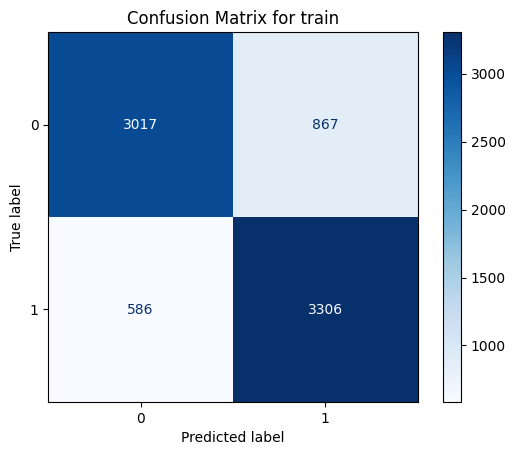

In [39]:
# for training

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

import matplotlib.pyplot as plt

cm=confusion_matrix(y_train,y_train_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.title('Confusion Matrix for train')
plt.show()

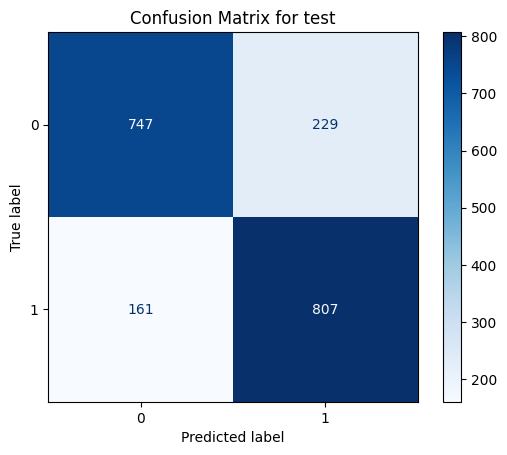

In [40]:
# for testing

cm=confusion_matrix(y_test,y_test_pred)

disp=ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Blues')
plt.title('Confusion Matrix for test')
plt.show()

Metrics

In [41]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
TrainAccurecy=[]

TrainAccurecy.append([
    accuracy_score(y_train,y_train_pred),
    precision_score(y_train,y_train_pred),
    recall_score(y_train,y_train_pred),
    f1_score(y_train,y_train_pred)
])

In [42]:
TrainAccurecy=pd.DataFrame(TrainAccurecy,index=['Logistic Regression'],columns=['Accurecy','Precision','Recall','f1_score'])

TrainAccurecy

,Accurecy,Precision,Recall,f1_score
Logistic Regression,0.813143,0.792236,0.849435,0.819839


In [43]:
TestAccurecy=[]

TestAccurecy.append([
    accuracy_score(y_test,y_test_pred),
    precision_score(y_test,y_test_pred),
    recall_score(y_test,y_test_pred),
    f1_score(y_test,y_test_pred)
])

In [44]:
TestAccurecy=pd.DataFrame(TestAccurecy,index=['Logistic Regression'],columns=['Accurecy','Precision','Recall','f1_score'])

TestAccurecy

,Accurecy,Precision,Recall,f1_score
Logistic Regression,0.799383,0.778958,0.833678,0.805389
